ROUND【1】，Total people：3000，infect：30
ROUND【2】，Total people：3000，infect：51


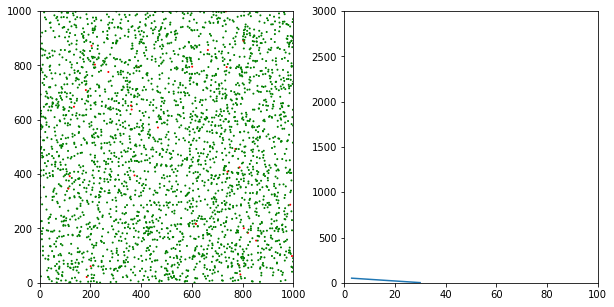

ROUND【3】，Total people：3000，infect：74
ROUND【4】，Total people：3000，infect：116
ROUND【5】，Total people：3000，infect：169
ROUND【6】，Total people：3000，infect：245
ROUND【7】，Total people：3000，infect：345
ROUND【8】，Total people：3000，infect：492
ROUND【9】，Total people：3000，infect：679
ROUND【10】，Total people：3000，infect：936
ROUND【11】，Total people：3000，infect：1239
ROUND【12】，Total people：3000，infect：1561
ROUND【13】，Total people：3000，infect：1871
ROUND【14】，Total people：3000，infect：2180
ROUND【15】，Total people：3000，infect：2400
ROUND【16】，Total people：3000，infect：2594
ROUND【17】，Total people：3000，infect：2717
ROUND【18】，Total people：3000，infect：2829
ROUND【19】，Total people：3000，infect：2899
ROUND【20】，Total people：3000，infect：2926
ROUND【21】，Total people：3000，infect：2949
ROUND【22】，Total people：3000，infect：2966
ROUND【23】，Total people：3000，infect：2980
ROUND【24】，Total people：3000，infect：2986
ROUND【25】，Total people：3000，infect：2990
ROUND【26】，Total people：3000，infect：2996
ROUND【27】，Total people：3000，infect：2997
ROUND【28】，Total 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Virus:
    def __init__(self):

        self.width = 1000
        self.population = 3000
        self.inital_infect = 30
        self.infection_rate = 10
        self.infection_range = 0.5
        self.location = np.random.rand(self.population, 2) * self.width
        # g-uninfect r-infect
        self.status = np.array(["g"] * self.population)
        self.inital_Patients()

    def dots(self):
        # All those who cross the border need to return to the border
        self.location += np.random.randn(self.population, 2) * self.width
    
        n = self.location[self.location < 0].size
        self.location[self.location < 0] = np.random.rand(n) * self.width
   
        n = self.location[self.location > self.width].size
        self.location[self.location > self.width] = self.width - np.random.rand(n) * self.width

    def inital_Patients(self):
        self.status[np.random.choice(self.population, size=self.inital_infect, replace=False)] = "r"


    @property
    def infected_people(self):
        "built-in decorator provides an interface to instance attributes"
        return self.location[self.status == "r"]

    @property
    def infected_people_number(self):
        return self.status[self.status == "r"].size


    def inffect(self):
        for ip in self.infected_people:
            # distance matrix
            m = np.sqrt(np.sum(np.asarray(ip - self.location)**2, axis=1))
            # infection probability matrix
            r = np.random.rand(len(m))
            #status: less than the infection distance, reach the infection probability(mark infected)
            self.status[(m < self.infection_rate) & (r < self.infection_range)] = "r"

    def report(self, n):
        current_patient_num = self.infected_people_number
        print("ROUND【{}】，Total people：{}，infect：{}".format(n, self.population, current_patient_num))
        n += 1
        return current_patient_num, n

    def show_result(self):
        a, b = self.report(1)
        plt.ion()
        fig = plt.figure(figsize=(10, 5))

        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)

        x = np.array(a)
        y = np.array(b)
        
        while a < self.population:
            ax1.cla()
            # discrete points
            ax1.scatter(self.location[:, 0], self.location[:, 1], c=self.status, s=1)
            # limit range of plot
            ax1.axis([0, self.width, 0, self.width])
            self.dots()
            self.inffect()
            a,b = self.report(b)
            # statistical plot
            ax2.cla()
            x = np.append(x, b)
            y = np.append(y, a)
            ax2.plot(x, y)
            ax2.axis([0, 100, 0, self.population])

            plt.pause(0.1)

        plt.ioff()
        plt.show()
        
if __name__ == "__main__":
    vs = Virus()
    vs.show_result()